# Data exploration
* Visualization and examination of statistical measures

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

* Data exploration is conducted solely on `train.csv` to avoid data leakage. 

In [3]:
train_df = pd.read_csv('../datasets/train.csv')

X = train_df.drop(["y", "shares"], axis=1)
y = train_df["y"]
train_df

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday,shares,y
0,17335,9.0,409.0,0.501326,1.0,0.587361,23.0,2.0,11.0,0.0,...,-0.187500,-0.100,0.50,0.500,0.00,0.500,Lifestyle,NaN,801,0
1,21242,10.0,317.0,0.725086,1.0,0.830097,6.0,3.0,NaN,21.0,...,-0.600000,NaN,0.00,0.000,0.50,0.000,Lifestyle,Tuesday,426,0
2,9448,11.0,447.0,0.584091,1.0,0.730104,NaN,1.0,1.0,1.0,...,-0.500000,-0.100,0.75,0.125,0.25,0.125,World,Friday,2400,1
3,36797,13.0,143.0,0.638298,NaN,0.787500,3.0,2.0,NaN,0.0,...,0.000000,0.000,1.00,NaN,0.50,0.500,Social Media,NaN,1100,0
4,29504,17.0,576.0,0.524412,1.0,0.714286,8.0,3.0,NaN,0.0,...,-1.000000,-0.100,0.00,0.000,0.50,0.000,World,Wednesday,1500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22195,8739,10.0,NaN,0.490196,1.0,0.655629,NaN,1.0,1.0,NaN,...,-0.700000,-0.100,NaN,0.000,0.50,0.000,Entertainment,Saturday,2600,1
22196,35936,12.0,2549.0,0.325581,1.0,0.495929,77.0,20.0,NaN,0.0,...,-0.800000,-0.050,0.00,0.000,0.50,0.000,Social Media,NaN,2900,1
22197,33258,10.0,223.0,0.645740,1.0,0.789855,4.0,2.0,1.0,0.0,...,-0.300000,-0.050,0.00,0.000,0.50,0.000,Business,Wednesday,772,0
22198,28306,10.0,592.0,0.434635,1.0,0.600000,NaN,7.0,1.0,1.0,...,-0.166667,-0.025,0.50,0.000,0.00,0.000,Business,Thursday,941,0


## Overview

In [9]:
train_df.head()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday,shares,y
0,17335,9.0,409.0,0.501326,1.0,0.587361,23.0,2.0,11.0,0.0,...,-0.1875,-0.1,0.50,0.500,0.00,0.500,Lifestyle,NaN,801,0
1,21242,10.0,317.0,0.725086,1.0,0.830097,6.0,3.0,NaN,21.0,...,-0.6000,NaN,0.00,0.000,0.50,0.000,Lifestyle,Tuesday,426,0
2,9448,11.0,447.0,0.584091,1.0,0.730104,NaN,1.0,1.0,1.0,...,-0.5000,-0.1,0.75,0.125,0.25,0.125,World,Friday,2400,1
3,36797,13.0,143.0,0.638298,NaN,0.787500,3.0,2.0,NaN,0.0,...,0.0000,0.0,1.00,NaN,0.50,0.500,Social Media,NaN,1100,0
4,29504,17.0,576.0,0.524412,1.0,0.714286,8.0,3.0,NaN,0.0,...,-1.0000,-0.1,0.00,0.000,0.50,0.000,World,Wednesday,1500,1


In [10]:
train_df.tail()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday,shares,y
22195,8739,10.0,NaN,0.490196,1.0,0.655629,NaN,1.0,1.0,NaN,...,-0.700000,-0.100,NaN,0.0,0.5,0.0,Entertainment,Saturday,2600,1
22196,35936,12.0,2549.0,0.325581,1.0,0.495929,77.0,20.0,NaN,0.0,...,-0.800000,-0.050,0.0,0.0,0.5,0.0,Social Media,NaN,2900,1
22197,33258,10.0,223.0,0.645740,1.0,0.789855,4.0,2.0,1.0,0.0,...,-0.300000,-0.050,0.0,0.0,0.5,0.0,Business,Wednesday,772,0
22198,28306,10.0,592.0,0.434635,1.0,0.600000,NaN,7.0,1.0,1.0,...,-0.166667,-0.025,0.5,0.0,0.0,0.0,Business,Thursday,941,0
22199,35842,NaN,354.0,0.528902,NaN,0.663551,NaN,3.0,1.0,0.0,...,-0.500000,-0.100,0.1,NaN,0.4,0.1,World,Wednesday,740,0


In [11]:
train_df.shape

(22200, 49)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22200 entries, 0 to 22199
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            22200 non-null  int64  
 1   n_tokens_title                20000 non-null  float64
 2   n_tokens_content              20054 non-null  float64
 3   n_unique_tokens               19942 non-null  float64
 4   n_non_stop_words              20017 non-null  float64
 5   n_non_stop_unique_tokens      19944 non-null  float64
 6   num_hrefs                     19967 non-null  float64
 7   num_self_hrefs                19920 non-null  float64
 8   num_imgs                      19986 non-null  float64
 9   num_videos                    19906 non-null  float64
 10  average_token_length          19987 non-null  float64
 11  num_keywords                  19955 non-null  float64
 12  kw_min_min                    19984 non-null  float64
 13  k

In [13]:
train_df.columns

Index(['id', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'data_c

* Check the number of missing values 

In [ ]:
train_df.isnull().sum()

id                                 0
n_tokens_title                  2200
n_tokens_content                2146
n_unique_tokens                 2258
n_non_stop_words                2183
n_non_stop_unique_tokens        2256
num_hrefs                       2233
num_self_hrefs                  2280
num_imgs                        2214
num_videos                      2294
average_token_length            2213
num_keywords                    2245
kw_min_min                      2216
kw_max_min                      2179
kw_avg_min                      2229
kw_min_max                      2215
kw_max_max                      2232
kw_avg_max                      2160
kw_min_avg                      2151
kw_max_avg                      2182
kw_avg_avg                      2177
self_reference_min_shares       2206
self_reference_max_shares       2174
self_reference_avg_sharess      2246
LDA_00                          2224
LDA_01                          2202
LDA_02                          2153
L

## Statistical Measures

### Statistics for numerical data

In [16]:
train_df.describe()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,y
count,22200.000000,20000.000000,20054.000000,19942.000000,20017.000000,19944.000000,19967.000000,19920.000000,19986.000000,19906.000000,...,20033.000000,19916.000000,19926.000000,19997.000000,19928.000000,19967.000000,19934.000000,19951.000000,22200.000000,22200.000000
mean,19856.270045,10.387150,543.920614,0.530611,0.970175,0.672893,10.840337,3.303263,4.473431,1.248669,...,0.755952,-0.259972,-0.523223,-0.107647,0.284772,0.070169,0.342966,0.155305,3459.794865,0.495676
std,11469.556277,2.105585,460.694982,0.138709,0.170108,0.155004,11.024976,3.944523,8.092647,4.087507,...,0.248262,0.127974,0.289365,0.096059,0.327151,0.264686,0.188498,0.225603,12767.254516,0.499993
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,22.000000,0.000000
25%,9948.750000,9.000000,246.000000,0.471005,1.000000,0.626836,4.000000,1.000000,1.000000,0.000000,...,0.600000,-0.329167,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,948.000000,0.000000
50%,19931.000000,10.000000,409.000000,0.539683,1.000000,0.691228,7.000000,3.000000,1.000000,0.000000,...,0.800000,-0.253718,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.000000,1400.000000,0.000000
75%,29780.250000,12.000000,715.750000,0.609865,1.000000,0.754545,14.000000,4.000000,4.000000,1.000000,...,1.000000,-0.187500,-0.300000,-0.050000,0.500000,0.138600,0.500000,0.250000,2800.000000,1.000000
max,39644.000000,19.000000,7413.000000,1.000000,1.000000,1.000000,186.000000,116.000000,108.000000,91.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,1.000000


In [17]:
train_df.corr(numeric_only=True)

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,y
id,1.000000,0.008988,-0.007422,-0.003065,-0.008102,-0.007731,-0.007487,-0.012500,-0.014170,0.007545,...,-0.003767,0.017934,0.015100,0.005676,-0.013930,0.001358,0.000737,-0.010266,-0.003861,-0.009158
n_tokens_title,0.008988,1.000000,0.023541,-0.047251,-0.037282,-0.039228,-0.055228,-0.006509,-0.000594,0.051128,...,-0.013543,-0.018025,-0.035693,0.017126,0.068287,-0.001073,-0.145166,0.039789,0.009078,-0.041227
n_tokens_content,-0.007422,0.023541,1.000000,-0.398486,0.205090,-0.221922,0.430657,0.306661,0.337536,0.105051,...,0.419247,-0.131754,-0.452310,0.225832,0.008217,0.022963,0.006482,0.013519,0.009058,0.036519
n_unique_tokens,-0.003065,-0.047251,-0.398486,1.000000,0.683342,0.938879,-0.106218,-0.050132,-0.234559,0.024296,...,0.167782,-0.234678,0.009216,-0.335749,-0.010892,-0.022390,-0.013495,-0.023115,-0.004528,-0.044716
n_non_stop_words,-0.008102,-0.037282,0.205090,0.683342,1.000000,0.765921,0.172456,0.151970,0.005419,0.019040,...,0.532898,-0.355066,-0.317372,-0.196825,-0.035813,-0.008012,0.014907,-0.031870,-0.013752,-0.019791
n_non_stop_unique_tokens,-0.007731,-0.039228,-0.221922,0.938879,0.765921,1.000000,-0.099160,-0.021691,-0.294532,0.014251,...,0.279840,-0.262085,-0.101583,-0.264854,-0.036663,-0.033076,0.004479,-0.042558,-0.019320,-0.054896
num_hrefs,-0.007487,-0.055228,0.430657,-0.106218,0.172456,-0.099160,1.000000,0.390430,0.346734,0.104649,...,0.290098,-0.151181,-0.263232,0.057079,0.049236,0.037624,0.012937,0.056505,0.044109,0.083695
num_self_hrefs,-0.012500,-0.006509,0.306661,-0.050132,0.151970,-0.021691,0.390430,1.000000,0.240875,0.072418,...,0.185734,-0.060291,-0.126765,0.039476,-0.016982,0.023663,0.014254,-0.012477,-0.012329,0.035575
num_imgs,-0.014170,-0.000594,0.337536,-0.234559,0.005419,-0.294532,0.346734,0.240875,1.000000,-0.071802,...,0.151686,-0.065473,-0.133366,0.050426,0.069582,0.048005,-0.017428,0.065819,0.033080,0.059683
num_videos,0.007545,0.051128,0.105051,0.024296,0.019040,0.014251,0.104649,0.072418,-0.071802,1.000000,...,0.122353,-0.111526,-0.133667,0.026593,0.064705,0.020817,-0.021863,0.059806,0.018305,0.002801


<Axes: >

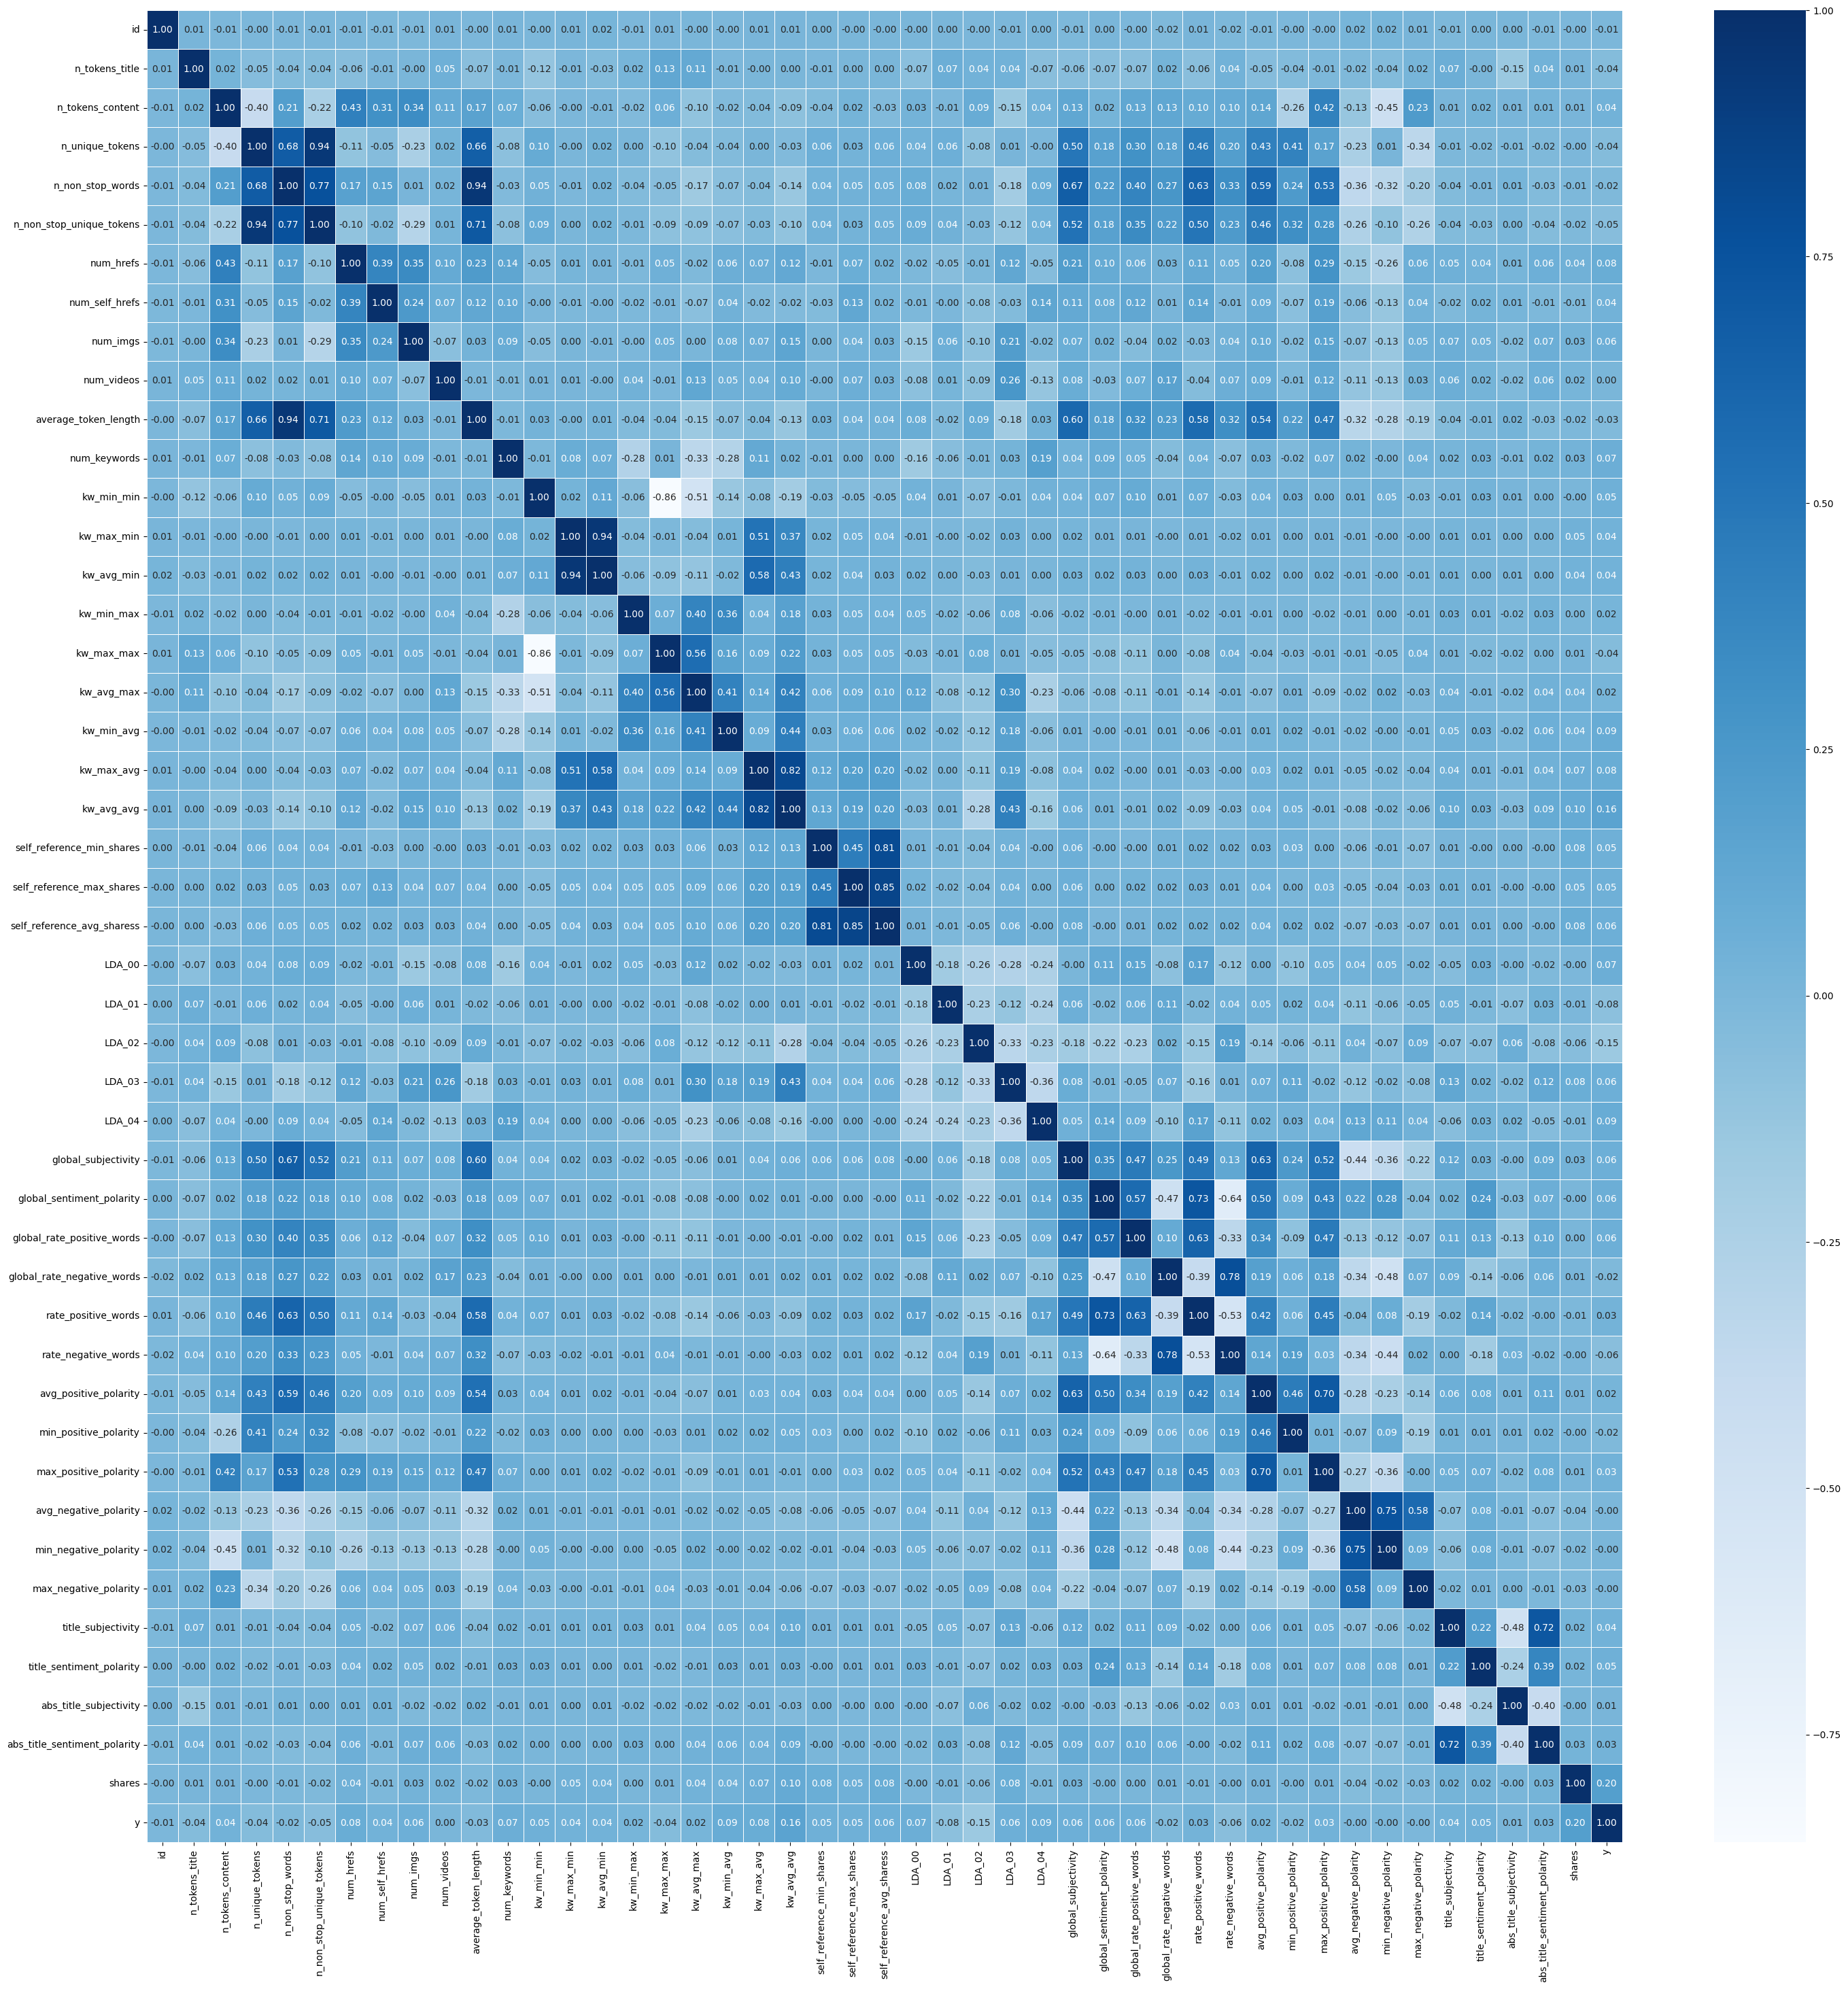

In [25]:
plt.figure(figsize=(35,35))
sns.heatmap(data = train_df.corr(numeric_only=True), annot=True, fmt = '.2f', linewidths=0.5, cmap='Blues')

### Statistics for categrical data

In [14]:
train_df.describe(include=['O'])

,data_channel,weekday
count,20053,20087
unique,6,7
top,World,Wednesday
freq,4245,3798


## 

### Quickhacks w/ AutoML

# Data preprocessing
* Normalization, encoding, and handling missing or outlier values, ….

# Data split